In [19]:
pip install tensorflow tensorflow-datasets matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
# === SETTINGS ===
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5

In [22]:
# === LOAD DATASET ===
(train_ds, val_ds), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

num_classes = ds_info.features['label'].num_classes

In [23]:
# === PREPROCESSING FUNCTION ===
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize
    label = tf.one_hot(label, depth=num_classes)
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [24]:
# === BUILD MODEL ===
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


In [25]:
# === COMPILE & TRAIN ===
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 54s 529ms/step - accuracy: 0.4044 - loss: 1.4408 - val_accuracy: 0.7589 - val_loss: 0.7374
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 543ms/step - accuracy: 0.7414 - loss: 0.7323 - val_accuracy: 0.8229 - val_loss: 0.5362
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 48s 524ms/step - accuracy: 0.8062 - loss: 0.5595 - val_accuracy: 0.8501 - val_loss: 0.4542
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 484ms/step - accuracy: 0.8331 - loss: 0.4884 - val_accuracy: 0.8651 - val_loss: 0.4086
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 512ms/step - accuracy: 0.8512 - loss: 0.4185 - val_accuracy: 0.8747 - val_loss: 0.3798


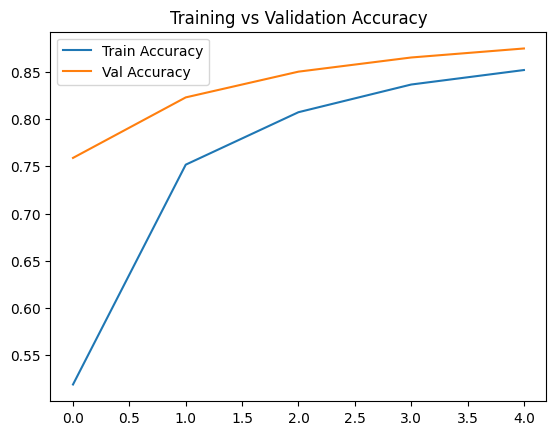

In [26]:
# === PLOT RESULTS ===
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [27]:
#Save the model
model.save('flower_model.keras')


In [28]:
# === Load model ===
model = tf.keras.models.load_model('flower_model.keras')

In [29]:
# === Load label names from tf_flowers ===
_, ds_info = tfds.load('tf_flowers', split='train', with_info=True)
class_names = ds_info.features['label'].names  # List of class labels

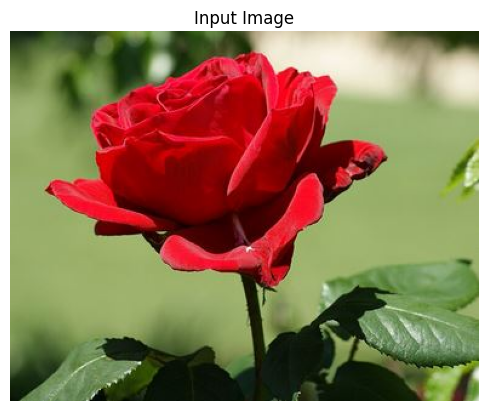

In [30]:
# === Image path ===
image_path = 'input_rose.jpg'  

img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

In [31]:
# === Preprocess the image ===
IMG_SIZE = 224

In [32]:
def load_and_preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB').resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image = load_and_preprocess_image(image_path)

In [33]:
# === Make prediction ===
predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])
confidence = np.max(predictions[0]) * 100

print(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: roses (60.78%)
